# Real sample data

In [1]:
#Import library
import numpy as np
import pandas as pd
import random
from utils import distance, fairness_calculation, generate_data, f_cost, plot_analysis
from experiment import experiment_baseline, run_experiment_baseline, experiment_knapsack, run_experiment_knapsack, experiment_mfc_knapsack, run_experiment_mfc_knapsack, experiment_CPLEX, run_experiment_CPLEX
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('Real-data-sample.csv')

In [3]:
n_wishes =3 
n_topic = 16
diff_cap = 1
min_of_min_cap = 2
max_of_min_cap = 8
alpha = 1
beta = 1
protected_att = 'Sex'
male = 'M'

In [4]:
def balance_score(data,protected_att,male):
    n_student_m = len(data[data[protected_att]==male])
    n_student_f = len(df) - n_student_m
    print("female:",n_student_f)
    print("male:",n_student_m)
    return (n_student_f/n_student_m)

In [5]:
balance_score(df,protected_att,male)

female: 8
male: 16


0.5

## Baseline CPLEX

In [6]:
#Read solution
#capacity = 2
#filename = 'solutions/real-'+str(capacity)+ '.csv' 
#solution_df = pd.read_csv(filename,header=None)

#clusters = {}
#for id in range(len(solution_df.iloc[0])):    
#    if solution_df.iloc[0][id]>0:        
#        clusters_key = id
#        clusters[clusters_key] = []
#for clusters_key in clusters.keys():
#    for id in range(1,len(solution_df)):
#        if solution_df.iloc[id][clusters_key]>0:
#            clusters[clusters_key].append(id-1)

In [7]:
dataname = 'real'
base_cplex_curr_min_cap, base_cplex_curr_nash, base_cplex_curr_satisfied, base_cplex_curr_balances, base_cplex_curr_capacities , base_cplex_curr_n_clusters, base_cplex_curr_count_instances, base_cplex_curr_tracking = run_experiment_CPLEX(dataname,df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)

Time taken for min of capacity 2 : 0.054 seconds.
Time taken for min of capacity 3 : 0.042 seconds.
Time taken for min of capacity 4 : 0.044 seconds.


D:\FairEdu\knapsack\MFC-knapsack\experiment.py:390: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


Time taken for min of capacity 5 : 0.042 seconds.
Time taken for min of capacity 6 : 0.041 seconds.
Time taken for min of capacity 7 : 0.041 seconds.
Time taken for min of capacity 8 : 0.036 seconds.


In [8]:
base_cplex_curr_nash_log = [math.log(base_cplex_curr_nash[id],base_cplex_curr_n_clusters[id]) for id in range(len(base_cplex_curr_nash))]

## Heuristic approach

In [9]:
base_curr_min_cap, base_curr_nash, base_curr_satisfied, base_curr_balances, base_curr_capacities , base_curr_n_clusters, base_curr_count_instances, base_curr_tracking = run_experiment_baseline(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap,protected_att = protected_att,male = male,  alpha = alpha, beta = beta, verbose = True)

Time taken for min of capacity 2 : 0.023 seconds.
Time taken for min of capacity 3 : 0.019 seconds.
Time taken for min of capacity 4 : 0.018 seconds.
Time taken for min of capacity 5 : 0.019 seconds.
Time taken for min of capacity 6 : 0.020 seconds.
Time taken for min of capacity 7 : 0.020 seconds.
Time taken for min of capacity 8 : 0.021 seconds.


D:\FairEdu\knapsack\MFC-knapsack\experiment.py:130: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


In [10]:
base_curr_nash_log = [math.log(base_curr_nash[id],base_curr_n_clusters[id]) for id in range(len(base_curr_nash))]

In [11]:
base_curr_nash

[5339.577649636242,
 5874.741380039232,
 8470.53926542208,
 2254.0178571428573,
 408.890625,
 1227.9374999999998,
 141.640625]

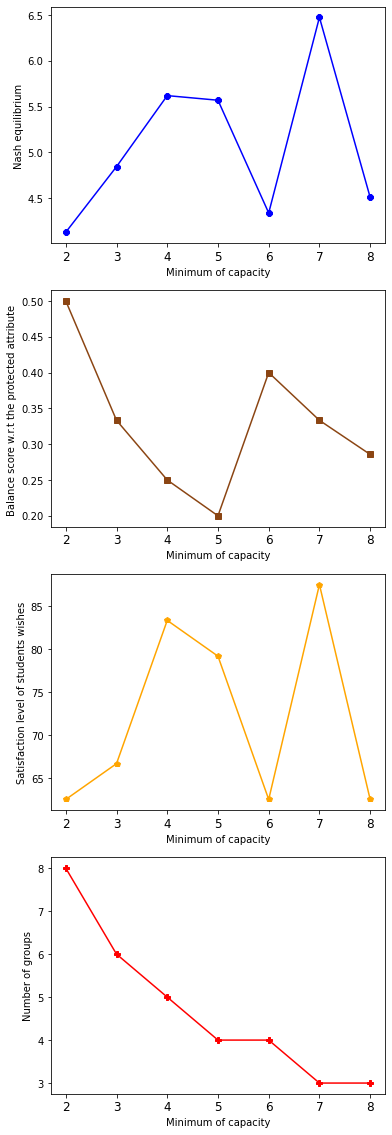

In [12]:
plot_analysis(base_curr_min_cap, base_curr_nash_log, base_curr_balances, base_curr_satisfied, base_curr_n_clusters, step_size=1, file_name = 'Real-data-Baseline_nash_balance_satisfied_wish_3_topic_16.pdf')

## Knapsack

In [13]:
knapsack_curr_min_cap, knapsack_curr_nash, knapsack_curr_satisfied, knapsack_curr_balances, knapsack_curr_capacities , knapsack_curr_n_clusters, knapsack_curr_count_instances, knapsack_curr_tracking = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = 1, beta = 1, verbose = True)

Time taken for min of capacity 2 : 0.023 seconds.
Time taken for min of capacity 3 : 0.021 seconds.
Time taken for min of capacity 4 : 0.017 seconds.
Time taken for min of capacity 5 : 0.017 seconds.
Time taken for min of capacity 6 : 0.019 seconds.
Time taken for min of capacity 7 : 0.018 seconds.
Time taken for min of capacity 8 : 0.019 seconds.


D:\FairEdu\knapsack\MFC-knapsack\experiment.py:222: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


In [14]:
knapsack_curr_nash_log = [math.log(knapsack_curr_nash[id],knapsack_curr_n_clusters[id]) for id in range(len(knapsack_curr_nash))]

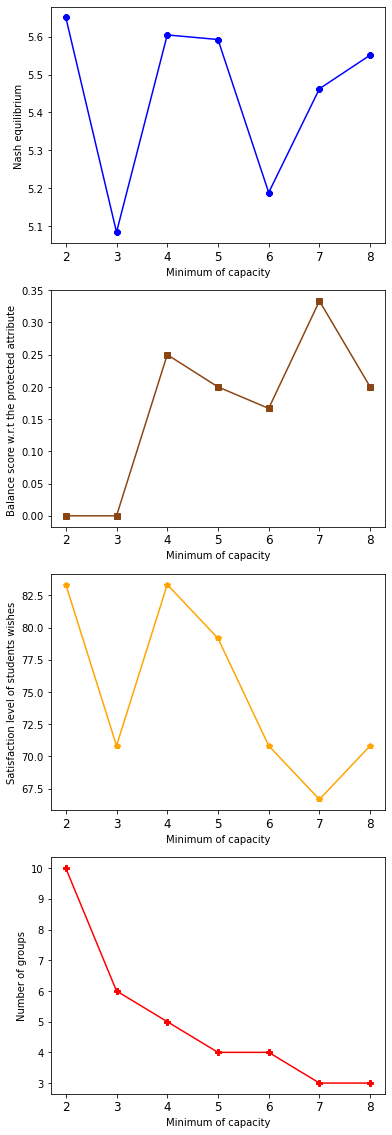

In [15]:
plot_analysis(knapsack_curr_min_cap, knapsack_curr_nash_log, knapsack_curr_balances, knapsack_curr_satisfied, knapsack_curr_n_clusters, step_size=1, file_name = 'Student-mat-Knapsack_nash_balance_satisfied_wish_3_topic_100.pdf')

## MFC Knapsack

In [16]:
mfc_knapsack_curr_min_cap, mfc_knapsack_curr_nash, mfc_knapsack_curr_satisfied, mfc_knapsack_curr_balances, mfc_knapsack_curr_capacities , mfc_knapsack_curr_n_clusters, mfc_knapsack_curr_count_instances, mfc_knapsack_curr_tracking = run_experiment_mfc_knapsack(df, n_wishes, n_topic, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',theta = balance_score(df,protected_att,male), alpha = 1, beta = 1,  verbose = True)

female: 8
male: 16
Time taken for min of capacity 2 : 0.031 seconds.
Time taken for min of capacity 3 : 0.023 seconds.
Time taken for min of capacity 4 : 0.024 seconds.
Time taken for min of capacity 5 : 0.028 seconds.
Time taken for min of capacity 6 : 0.025 seconds.
Time taken for min of capacity 7 : 0.027 seconds.
Time taken for min of capacity 8 : 0.027 seconds.


D:\FairEdu\knapsack\MFC-knapsack\experiment.py:304: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


In [17]:
mfc_knapsack_curr_nash_log = [math.log(mfc_knapsack_curr_nash[id],mfc_knapsack_curr_n_clusters[id]) for id in range(len(mfc_knapsack_curr_nash))]

## Comparison plot

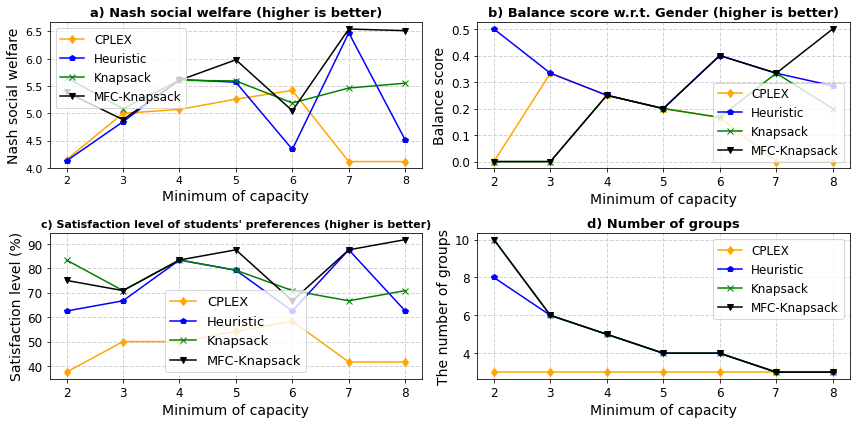

In [18]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax[0,0].plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax[0,0].plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax[0,0].plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax[0,0].plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=11)
ax[0,0].yaxis.set_tick_params(labelsize=11)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=12)

#Balance score wrt protected attribute 
ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[0,1].plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax[0,1].plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax[0,1].plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax[0,1].plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax[0,1].yaxis.set_tick_params(labelsize=12)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=12)

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,0].plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax[1,0].plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax[1,0].plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax[1,0].plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 11, 'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=13)

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,1].plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax[1,1].plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax[1,1].plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax[1,1].plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax[1,1].yaxis.set_tick_params(labelsize=12)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=12)
plt.tight_layout()
#file_output_name ='Plot_real'+ str(alpha)+'_'+str(beta)+ '.pdf'
file_output_name = 'Plot_real.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

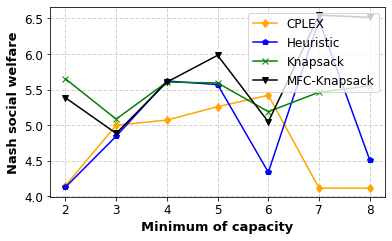

In [19]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax.plot(base_cplex_curr_nash_log, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_nash_log, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_nash_log, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_nash_log, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig("mfc.Plot_real.Nash.pdf",bbox_inches='tight')
plt.show()

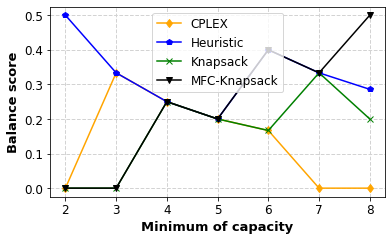

In [20]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(base_cplex_curr_balances, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_balances, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_balances, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_balances, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig("mfc.Plot_real.Balance.pdf",bbox_inches='tight')
plt.show()

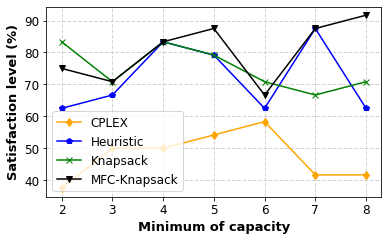

In [21]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))
#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(base_cplex_curr_satisfied, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_satisfied, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_satisfied, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_satisfied, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 11, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig("mfc.Plot_real.Satisfaction.pdf",bbox_inches='tight')
plt.show()

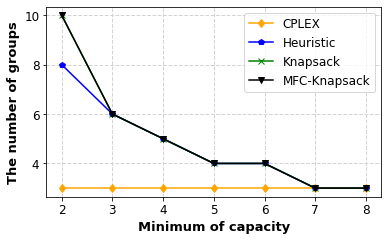

In [22]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.5))
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(base_cplex_curr_n_clusters, marker='d', color='orange', label="CPLEX")
ax.plot(base_curr_n_clusters, marker='p', color='blue', label="Heuristic")
ax.plot(knapsack_curr_n_clusters, marker='x', color='green', label="Knapsack")
ax.plot(mfc_knapsack_curr_n_clusters, marker='v', color='black', label="MFC-Knapsack")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("d) Number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.legend(fontsize=12)
plt.savefig("mfc.Plot_real.Number.pdf",bbox_inches='tight')
plt.show()

# Effect of parameters

In [23]:
alpha = 0.1
beta = 1
knapsack_curr_min_cap01, knapsack_curr_nash01, knapsack_curr_satisfied01, knapsack_curr_balances01, knapsack_curr_capacities01 , knapsack_curr_n_clusters01, knapsack_curr_count_instances01, knapsack_curr_tracking01 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log01 = [math.log(knapsack_curr_nash01[id],knapsack_curr_n_clusters01[id]) for id in range(len(knapsack_curr_nash01))]

Time taken for min of capacity 2 : 0.039 seconds.
Time taken for min of capacity 3 : 0.019 seconds.
Time taken for min of capacity 4 : 0.017 seconds.
Time taken for min of capacity 5 : 0.017 seconds.
Time taken for min of capacity 6 : 0.019 seconds.
Time taken for min of capacity 7 : 0.021 seconds.
Time taken for min of capacity 8 : 0.024 seconds.


D:\FairEdu\knapsack\MFC-knapsack\experiment.py:222: RuntimeWarning: invalid value encountered in double_scalars
  w[i][j] = (w[i][j] * 1.0) / (w_max[j] * 1.0)


In [24]:
alpha = 0.5
beta = 1
knapsack_curr_min_cap51, knapsack_curr_nash51, knapsack_curr_satisfied51, knapsack_curr_balances51, knapsack_curr_capacities51 , knapsack_curr_n_clusters51, knapsack_curr_count_instances51, knapsack_curr_tracking51 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log51 = [math.log(knapsack_curr_nash51[id],knapsack_curr_n_clusters51[id]) for id in range(len(knapsack_curr_nash51))]

Time taken for min of capacity 2 : 0.026 seconds.
Time taken for min of capacity 3 : 0.020 seconds.
Time taken for min of capacity 4 : 0.071 seconds.
Time taken for min of capacity 5 : 0.019 seconds.
Time taken for min of capacity 6 : 0.020 seconds.
Time taken for min of capacity 7 : 0.018 seconds.
Time taken for min of capacity 8 : 0.020 seconds.


In [25]:
alpha = 1
beta = 0.1
knapsack_curr_min_cap10, knapsack_curr_nash10, knapsack_curr_satisfied10, knapsack_curr_balances10, knapsack_curr_capacities10 , knapsack_curr_n_clusters10, knapsack_curr_count_instances10, knapsack_curr_tracking10 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log10 = [math.log(knapsack_curr_nash10[id],knapsack_curr_n_clusters10[id]) for id in range(len(knapsack_curr_nash10))]

Time taken for min of capacity 2 : 0.022 seconds.
Time taken for min of capacity 3 : 0.019 seconds.
Time taken for min of capacity 4 : 0.019 seconds.
Time taken for min of capacity 5 : 0.019 seconds.
Time taken for min of capacity 6 : 0.018 seconds.
Time taken for min of capacity 7 : 0.019 seconds.
Time taken for min of capacity 8 : 0.022 seconds.


In [26]:
alpha = 1
beta = 0.5
knapsack_curr_min_cap15, knapsack_curr_nash15, knapsack_curr_satisfied15, knapsack_curr_balances15, knapsack_curr_capacities15 , knapsack_curr_n_clusters15, knapsack_curr_count_instances15, knapsack_curr_tracking15 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log15 = [math.log(knapsack_curr_nash15[id],knapsack_curr_n_clusters15[id]) for id in range(len(knapsack_curr_nash15))]

Time taken for min of capacity 2 : 0.021 seconds.
Time taken for min of capacity 3 : 0.018 seconds.
Time taken for min of capacity 4 : 0.018 seconds.
Time taken for min of capacity 5 : 0.020 seconds.
Time taken for min of capacity 6 : 0.020 seconds.
Time taken for min of capacity 7 : 0.018 seconds.
Time taken for min of capacity 8 : 0.021 seconds.


In [27]:
alpha = 1
beta = 1
knapsack_curr_min_cap11, knapsack_curr_nash11, knapsack_curr_satisfied11, knapsack_curr_balances11, knapsack_curr_capacities11 , knapsack_curr_n_clusters11, knapsack_curr_count_instances11, knapsack_curr_tracking11 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log11 = [math.log(knapsack_curr_nash11[id],knapsack_curr_n_clusters11[id]) for id in range(len(knapsack_curr_nash11))]

Time taken for min of capacity 2 : 0.026 seconds.
Time taken for min of capacity 3 : 0.017 seconds.
Time taken for min of capacity 4 : 0.017 seconds.
Time taken for min of capacity 5 : 0.017 seconds.
Time taken for min of capacity 6 : 0.019 seconds.
Time taken for min of capacity 7 : 0.023 seconds.
Time taken for min of capacity 8 : 0.023 seconds.


In [28]:
alpha = 0.1
beta = 0.1
knapsack_curr_min_cap00, knapsack_curr_nash00, knapsack_curr_satisfied00, knapsack_curr_balances00, knapsack_curr_capacities00 , knapsack_curr_n_clusters00, knapsack_curr_count_instances00, knapsack_curr_tracking00 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log00 = [math.log(knapsack_curr_nash00[id],knapsack_curr_n_clusters00[id]) for id in range(len(knapsack_curr_nash00))]

Time taken for min of capacity 2 : 0.023 seconds.
Time taken for min of capacity 3 : 0.020 seconds.
Time taken for min of capacity 4 : 0.017 seconds.
Time taken for min of capacity 5 : 0.018 seconds.
Time taken for min of capacity 6 : 0.020 seconds.
Time taken for min of capacity 7 : 0.020 seconds.
Time taken for min of capacity 8 : 0.019 seconds.


In [29]:
alpha = 0.5
beta = 0.5
knapsack_curr_min_cap55, knapsack_curr_nash55, knapsack_curr_satisfied55, knapsack_curr_balances55, knapsack_curr_capacities55 , knapsack_curr_n_clusters55, knapsack_curr_count_instances55, knapsack_curr_tracking55 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log55 = [math.log(knapsack_curr_nash55[id],knapsack_curr_n_clusters55[id]) for id in range(len(knapsack_curr_nash55))]

Time taken for min of capacity 2 : 0.021 seconds.
Time taken for min of capacity 3 : 0.019 seconds.
Time taken for min of capacity 4 : 0.020 seconds.
Time taken for min of capacity 5 : 0.019 seconds.
Time taken for min of capacity 6 : 0.018 seconds.
Time taken for min of capacity 7 : 0.019 seconds.
Time taken for min of capacity 8 : 0.020 seconds.


In [30]:
alpha = 0.1
beta = 0.5
knapsack_curr_min_cap05, knapsack_curr_nash05, knapsack_curr_satisfied05, knapsack_curr_balances05, knapsack_curr_capacities05 , knapsack_curr_n_clusters05, knapsack_curr_count_instances05, knapsack_curr_tracking05 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log05 = [math.log(knapsack_curr_nash05[id],knapsack_curr_n_clusters05[id]) for id in range(len(knapsack_curr_nash05))]

Time taken for min of capacity 2 : 0.023 seconds.
Time taken for min of capacity 3 : 0.017 seconds.
Time taken for min of capacity 4 : 0.018 seconds.
Time taken for min of capacity 5 : 0.019 seconds.
Time taken for min of capacity 6 : 0.022 seconds.
Time taken for min of capacity 7 : 0.023 seconds.
Time taken for min of capacity 8 : 0.022 seconds.


In [31]:
alpha = 0.5
beta = 0.1
knapsack_curr_min_cap50, knapsack_curr_nash50, knapsack_curr_satisfied50, knapsack_curr_balances50, knapsack_curr_capacities50 , knapsack_curr_n_clusters50, knapsack_curr_count_instances50, knapsack_curr_tracking50 = run_experiment_knapsack(df, n_wishes, n_topic, min_of_min_cap, max_of_min_cap, diff_cap = diff_cap, protected_att = 'Sex',male = 'M',alpha = alpha, beta = beta, verbose = True)
knapsack_curr_nash_log50 = [math.log(knapsack_curr_nash50[id],knapsack_curr_n_clusters50[id]) for id in range(len(knapsack_curr_nash50))]

Time taken for min of capacity 2 : 0.023 seconds.
Time taken for min of capacity 3 : 0.022 seconds.
Time taken for min of capacity 4 : 0.021 seconds.
Time taken for min of capacity 5 : 0.021 seconds.
Time taken for min of capacity 6 : 0.021 seconds.
Time taken for min of capacity 7 : 0.020 seconds.
Time taken for min of capacity 8 : 0.022 seconds.


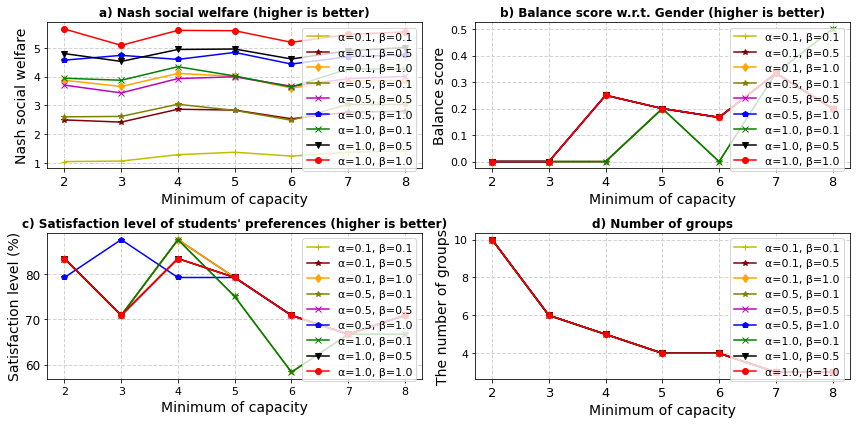

In [32]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax[0,0].grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax[0,0].plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,0].plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,0].plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,0].plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax[0,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,0].yaxis.set_tick_params(labelsize=11)
ax[0,0].set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax[0,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,0].set_ylabel("Nash social welfare",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,0].legend(fontsize=11)

#Balance score wrt protected attribute 
ax[0,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[0,1].plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[0,1].plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[0,1].plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[0,1].plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[0,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[0,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[0,1].yaxis.set_tick_params(labelsize=11)
ax[0,1].set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax[0,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,1].set_ylabel("Balance score",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[0,1].legend(fontsize=11)

#Satisfaction level 
ax[1,0].grid(color='lightgrey', linestyle='--', linewidth=1)

ax[1,0].plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,0].plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,0].plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,0].plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,0].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,0].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=11)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax[1,0].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,0].set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,0].legend(fontsize=11)

#Number of groups
ax[1,1].grid(color='lightgrey', linestyle='--', linewidth=1)
ax[1,1].plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax[1,1].plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax[1,1].plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax[1,1].plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax[1,1].set_xticks(list(range(0, len(xticks), 1))) 
ax[1,1].set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=13)
ax[1,1].yaxis.set_tick_params(labelsize=11)
ax[1,1].set_title("d) Number of groups",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax[1,1].set_xlabel("Minimum of capacity",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,1].set_ylabel("The number of groups",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax[1,1].legend(fontsize=11)
plt.tight_layout()
file_output_name = 'Plot_real_alpha_beta.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

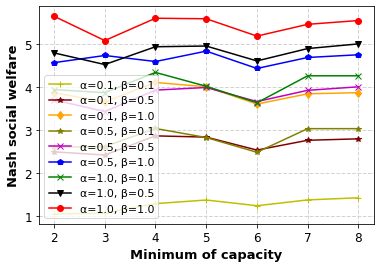

In [33]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
#Nash equilibrium
ax.plot(knapsack_curr_nash_log00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_nash_log10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_nash_log15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_nash_log11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")
ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("a) Nash social welfare (higher is better)",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("Nash social welfare",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.legend(fontsize=11)
file_output_name = 'mfc.Plot_real_alpha_beta.Nash.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

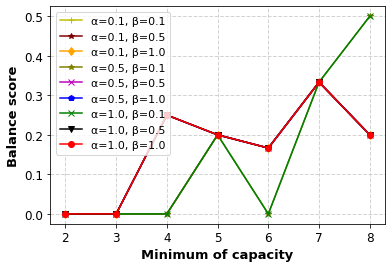

In [34]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
#Balance score wrt protected attribute 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_balances00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_balances05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_balances01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_balances50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_balances55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_balances51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_balances10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_balances15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_balances11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("b) Balance score w.r.t. Gender (higher is better)",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("Balance score",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.legend(fontsize=11)
file_output_name = 'mfc.Plot_real_alpha_beta.Balance.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

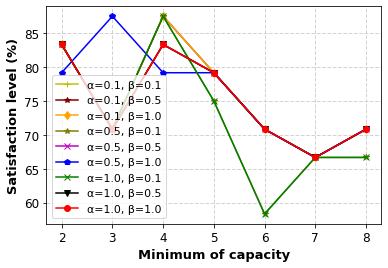

In [35]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

#Satisfaction level 
ax.grid(color='lightgrey', linestyle='--', linewidth=1)

ax.plot(knapsack_curr_satisfied00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_satisfied10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_satisfied15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_satisfied11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("c) Satisfaction level of students' preferences (higher is better)",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("Satisfaction level (%)",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.legend(fontsize=11)

file_output_name = 'mfc.Plot_real_alpha_beta.Satisfaction.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()

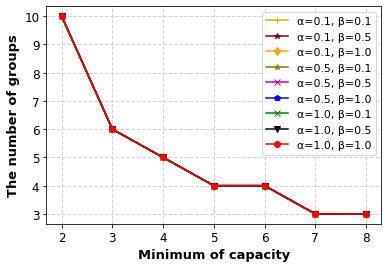

In [36]:
xticks = [i for i in range(min_of_min_cap, max_of_min_cap+1)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
#Number of groups
ax.grid(color='lightgrey', linestyle='--', linewidth=1)
ax.plot(knapsack_curr_n_clusters00, marker='+', color='y', label="\u03B1=0.1, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters05, marker='*', color='maroon', label="\u03B1=0.1, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters01, marker='d', color='orange', label="\u03B1=0.1, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters50, marker='*', color='olive', label="\u03B1=0.5, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters55, marker='x', color='m', label="\u03B1=0.5, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters51, marker='p', color='blue', label="\u03B1=0.5, \u03B2=1.0")
ax.plot(knapsack_curr_n_clusters10, marker='x', color='green', label="\u03B1=1.0, \u03B2=0.1")
ax.plot(knapsack_curr_n_clusters15, marker='v', color='black', label="\u03B1=1.0, \u03B2=0.5")
ax.plot(knapsack_curr_n_clusters11, marker='o', color='red', label="\u03B1=1.0, \u03B2=1.0")

ax.set_xticks(list(range(0, len(xticks), 1))) 
ax.set_xticklabels(list(range(min(xticks), max(xticks)+1, 1)), fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
#ax.set_title("d) Number of groups",fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax.set_xlabel("Minimum of capacity",fontdict={'fontsize': 13, 'fontweight': 'bold'})
ax.set_ylabel("The number of groups",fontdict={'fontsize': 13, 'fontweight': 'bold'})

ax.legend(fontsize=11)

file_output_name = 'mfc.Plot_real_alpha_beta.Number.pdf'
plt.savefig(file_output_name,bbox_inches='tight')
plt.show()